# Timeseries Exercise

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
plt.style.use('dark_background')
import tensorflow as tf

In [3]:
df = pd.read_csv('Data4.csv')

In [4]:
df.head()

,Date,No of Good Result
0,31/1/2000 12:01:00,4
1,28/2/2000 12:01:00,2
2,31/3/2000 12:01:00,2
3,30/4/2000 12:01:00,3
4,31/5/2000 12:01:00,2


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date                 datetime64[ns]
No of Good Result             int64
dtype: object


In [6]:
df.isnull().sum()

Date                 0
No of Good Result    0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date                 datetime64[ns]
No of Good Result             int64
dtype: object


In [8]:
df.set_index('Date', inplace=True)

In [9]:
df

,No of Good Result
Date,
2000-01-31 12:01:00,4
2000-02-28 12:01:00,2
2000-03-31 12:01:00,2
2000-04-30 12:01:00,3
2000-05-31 12:01:00,2
...,...
2015-08-31 12:01:00,34
2015-09-30 12:01:00,60
2015-10-31 12:01:00,60


###### Explanatory Data Analysis (EDA)######

<AxesSubplot:xlabel='Date'>

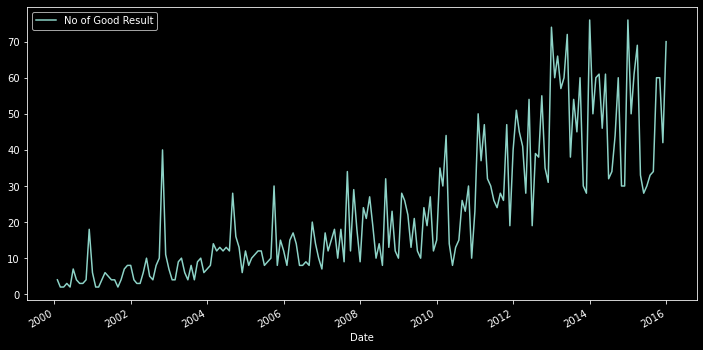

In [10]:
df.plot(figsize=(12,6))

In [11]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.9382427853855619  if above 0.05, data is not stationary


In [12]:
### plotting to see how the Good results are trending ###
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

<AxesSubplot:xlabel='year', ylabel='No of Good Result'>

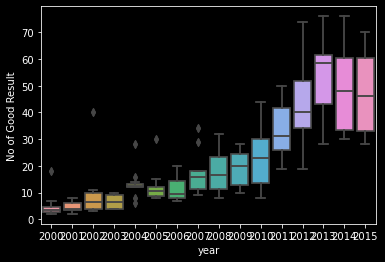

In [13]:
sns.boxplot(x='year', y='No of Good Result', data=df)
sns.boxplot(x='year', y='No of Good Result', data=df)

## The Good results are increasing year by year (that is yearly)

In [14]:
#Decomposing the data, to see the trend, seasonal and residual so as to understand the data better#

from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['No of Good Result'],  
                            model ='additive', period=12)

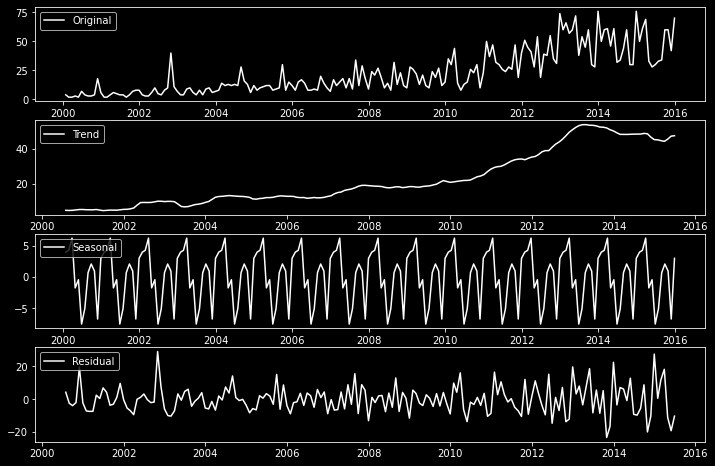

In [15]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['No of Good Result'], label='Original', color='white')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='white')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='white')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='white')
plt.legend(loc='upper left')
plt.show()

In [ ]:
###### Prediction #######

In [16]:
df1 = pd.read_csv('Data4.csv',usecols=[1])

In [17]:
df1.head()

,No of Good Result
0,4
1,2
2,2
3,3
4,2


In [18]:
df2 = df1.values
df2 = df2.astype('float32')

In [19]:
df2

array([[ 4.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 7.],
       [ 4.],
       [ 3.],
       [ 3.],
       [ 4.],
       [18.],
       [ 6.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 6.],
       [ 5.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 4.],
       [ 7.],
       [ 8.],
       [ 8.],
       [ 4.],
       [ 3.],
       [ 3.],
       [ 6.],
       [10.],
       [ 5.],
       [ 4.],
       [ 8.],
       [10.],
       [40.],
       [11.],
       [ 7.],
       [ 4.],
       [ 4.],
       [ 9.],
       [10.],
       [ 6.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 9.],
       [10.],
       [ 6.],
       [ 7.],
       [ 8.],
       [14.],
       [12.],
       [13.],
       [12.],
       [13.],
       [12.],
       [28.],
       [16.],
       [13.],
       [ 6.],
       [12.],
       [ 8.],
       [10.],
       [11.],
       [12.],
       [12.],
       [ 8.],
       [ 9.],
       [10.],
       [30.],
       [ 8.],
       [15.],
      

In [20]:
### LSTM are sensitive to the scale of data therefore I apply MinMax scaler for scaling ###
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
df2 = scaler.fit_transform(df2)

In [21]:
##splitting dataset into train and test split
train_size = int(len(df2) * 0.70)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [22]:
train_size,test_size

(134, 58)

In [23]:
train

array([[0.02702703],
       [0.        ],
       [0.        ],
       [0.01351351],
       [0.        ],
       [0.06756757],
       [0.02702703],
       [0.01351351],
       [0.01351351],
       [0.02702703],
       [0.21621622],
       [0.05405406],
       [0.        ],
       [0.        ],
       [0.02702703],
       [0.05405406],
       [0.04054055],
       [0.02702703],
       [0.02702703],
       [0.        ],
       [0.02702703],
       [0.06756757],
       [0.08108108],
       [0.08108108],
       [0.02702703],
       [0.01351351],
       [0.01351351],
       [0.05405406],
       [0.10810812],
       [0.04054055],
       [0.02702703],
       [0.08108108],
       [0.10810812],
       [0.51351357],
       [0.12162162],
       [0.06756757],
       [0.02702703],
       [0.02702703],
       [0.0945946 ],
       [0.10810812],
       [0.05405406],
       [0.02702703],
       [0.08108108],
       [0.02702703],
       [0.0945946 ],
       [0.10810812],
       [0.05405406],
       [0.067

In [102]:
def to_sequences(df2, seq_size=1):
    x = []
    y = []

    for i in range(len(df2)-seq_size-1):
        #print(i)
        window = df2[i:(i+seq_size), 0]
        x.append(window)
        y.append(df2[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [103]:
# reshaping into X=t, t+1, t+2, t+3 and Y=t+4
seq_size = 12    #Number of time steps to look back#

In [104]:
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [105]:
### Reshaping input to be [samples, seq_size, features] which is required for LSTM model ###
trainX = trainX.reshape(trainX.shape[0],trainX.shape[1] , 1)
testX = testX.reshape(testX.shape[0],testX.shape[1] , 1)

In [106]:
trainX

array([[[0.02702703],
        [0.        ],
        [0.        ],
        ...,
        [0.02702703],
        [0.21621622],
        [0.05405406]],

       [[0.        ],
        [0.        ],
        [0.01351351],
        ...,
        [0.21621622],
        [0.05405406],
        [0.        ]],

       [[0.        ],
        [0.01351351],
        [0.        ],
        ...,
        [0.05405406],
        [0.        ],
        [0.        ]],

       ...,

       [[0.13513514],
        [0.17567568],
        [0.44594595],
        ...,
        [0.3243243 ],
        [0.28378376],
        [0.37837836]],

       [[0.17567568],
        [0.44594595],
        [0.37837836],
        ...,
        [0.28378376],
        [0.37837836],
        [0.10810812]],

       [[0.44594595],
        [0.37837836],
        [0.5675676 ],
        ...,
        [0.37837836],
        [0.10810812],
        [0.28378376]]], dtype=float32)

In [107]:
### Creating the Stacked LSTM model ###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [108]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(12,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 12, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 12, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 125ms/step - loss: 0.0094 - val_loss: 0.3371
Epoch 2/100
2/2 [==============================] - 0s 91ms/step - loss: 0.0095 - val_loss: 0.3518
Epoch 3/100
2/2 [==============================] - 0s 85ms/step - loss: 0.0095 - val_loss: 0.4708
Epoch 4/100
2/2 [==============================] - 0s 79ms/step - loss: 0.0093 - val_loss: 0.4273
Epoch 5/100
2/2 [==============================] - 0s 89ms/step - loss: 0.0092 - val_loss: 0.4065
Epoch 6/100
2/2 [==============================] - 0s 82ms/step - loss: 0.0093 - val_loss: 0.4915
Epoch 7/100
2/2 [==============================] - 0s 75ms/step - loss: 0.0092 - val_loss: 0.6014
Epoch 8/100
2/2 [==============================] - 0s 91ms/step - loss: 0.0091 - val_loss: 0.6744
Epoch 9/100
2/2 [==============================] - 0s 80ms/step - loss: 0.0092 - val_loss: 0.6405
Epoch 10/100
2/2 [==============================] - 0s 82ms/step - loss: 0.0091 - val_loss: 0.6765
Epoch 11/100
2/2 [

In [117]:
### Doing the prediction and checking performance metrics
train_predict=model.predict(trainX)
test_predict=model.predict(testX)

2/2 [==============================] - 0s 9ms/step


In [118]:
##Transformbacking back prediction to original form ##
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [119]:
test_predict

array([[55.26322 ],
       [42.804367],
       [39.732445],
       [37.33766 ],
       [39.413277],
       [45.473385],
       [49.388912],
       [57.473736],
       [47.830616],
       [62.32145 ],
       [64.86738 ],
       [60.311737],
       [56.449593],
       [53.116714],
       [60.88931 ],
       [47.341187],
       [61.42917 ],
       [63.616364],
       [67.75465 ],
       [62.285137],
       [67.928986],
       [77.89639 ],
       [74.99253 ],
       [75.39016 ],
       [73.32974 ],
       [73.83057 ],
       [73.27107 ],
       [64.073715],
       [69.04485 ],
       [66.577614],
       [67.86295 ],
       [58.018017],
       [65.60987 ],
       [76.64327 ],
       [70.69652 ],
       [72.717674],
       [70.986206],
       [66.174255],
       [66.95634 ],
       [55.559994],
       [60.600224],
       [66.33476 ],
       [67.9969  ],
       [58.08833 ],
       [65.77784 ]], dtype=float32)

In [120]:
### Calculating RMSE performance metrics ###
### Train Data RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(trainY,train_predict))

14.285009911747032

In [121]:
### Test Data RMSE
math.sqrt(mean_squared_error(testY,test_predict))

62.058583791975344

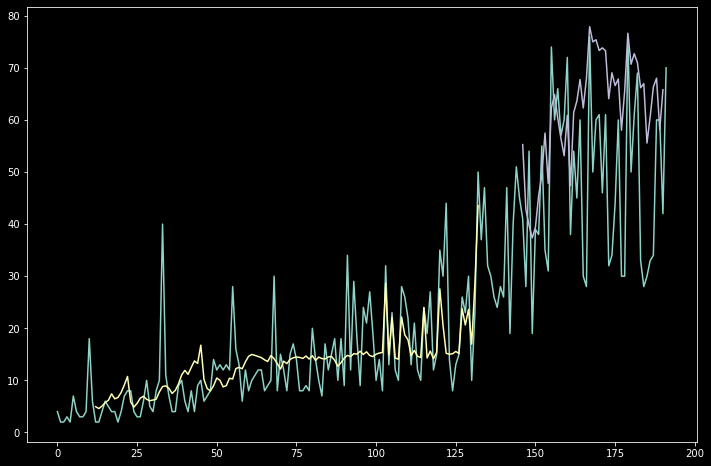

In [122]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(12,8))
look_back=12
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

###### forecasting Good result for the next 48 months (that is next 4 years)  ######

In [123]:
len(test)

58

In [124]:
x_input=test[46:].reshape(1,-1)
x_input.shape

(1, 12)

In [125]:
good_input=list(x_input)
good_input=good_input[0].tolist()

In [126]:
good_input

[0.6486486792564392,
 0.7972973585128784,
 0.9054054617881775,
 0.4189189076423645,
 0.3513513505458832,
 0.37837836146354675,
 0.4189189076423645,
 0.4324324429035187,
 0.7837837934494019,
 0.7837837934494019,
 0.5405405759811401,
 0.9189189672470093]

In [127]:
# demonstrating the steps for prediction for the next 48 months (that is; 4 years)
from numpy import array

lst_output=[]
seq_size=12
i=0
while(i<49):
    
    if(len(good_input)>12):
        #print(good_input)
        x_input=np.array(good_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, seq_size, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        good_input.extend(yhat[0].tolist())
        good_input=good_input[1:]
        #print(good_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, seq_size,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        good_input.extend(yhat[0].tolist())
        print(len(good_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.91508365]
13
1 month input [0.79729736 0.90540546 0.41891891 0.35135135 0.37837836 0.41891891
 0.43243244 0.78378379 0.78378379 0.54054058 0.91891897 0.91508365]
1 month output [[0.93900657]]
2 month input [0.90540546 0.41891891 0.35135135 0.37837836 0.41891891 0.43243244
 0.78378379 0.78378379 0.54054058 0.91891897 0.91508365 0.93900657]
2 month output [[0.89058995]]
3 month input [0.41891891 0.35135135 0.37837836 0.41891891 0.43243244 0.78378379
 0.78378379 0.54054058 0.91891897 0.91508365 0.93900657 0.89058995]
3 month output [[0.6372185]]
4 month input [0.35135135 0.37837836 0.41891891 0.43243244 0.78378379 0.78378379
 0.54054058 0.91891897 0.91508365 0.93900657 0.89058995 0.63721848]
4 month output [[0.63428295]]
5 month input [0.37837836 0.41891891 0.43243244 0.78378379 0.78378379 0.54054058
 0.91891897 0.91508365 0.93900657 0.89058995 0.63721848 0.63428295]
5 month output [[0.70799893]]
6 month input [0.41891891 0.43243244 0.78378379 0.78378379 0.54054058 0.91891897
 0.915083

In [128]:
month_new=np.arange(1,13)
month_pred=np.arange(13,61)

In [129]:
len(df2)

192

In [130]:
import matplotlib.pyplot as plt

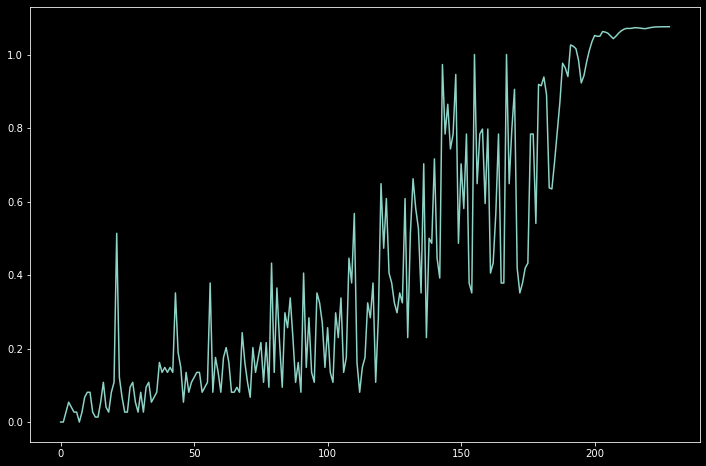

In [131]:
plt.figure(figsize=(12,8))
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[12:])

In [132]:
 ### transforming back to see the original values of the Good results for the next 48 months
df3=scaler.inverse_transform(df3).tolist()

In [133]:
df3

# the forcasted Good Result values from year 2016 to year 2020# 
### the first value (4.0)implies having only 4 nos of Good result from players in January 2016 etc...###

[[4.0],
 [2.0],
 [2.0],
 [3.0000000689178687],
 [2.0],
 [7.000000206753606],
 [4.0],
 [3.0000000689178687],
 [3.0000000689178687],
 [4.0],
 [18.0],
 [6.000000275671475],
 [2.0],
 [2.0],
 [4.0],
 [6.000000275671475],
 [5.000000344589345],
 [4.0],
 [4.0],
 [2.0],
 [4.0],
 [7.000000206753606],
 [8.000000137835737],
 [8.000000137835737],
 [4.0],
 [3.0000000689178687],
 [3.0000000689178687],
 [6.000000275671475],
 [10.00000055134295],
 [5.000000344589345],
 [4.0],
 [8.000000137835737],
 [10.00000055134295],
 [40.00000289455049],
 [10.999999931082131],
 [7.000000206753606],
 [4.0],
 [4.0],
 [9.000000068917869],
 [10.00000055134295],
 [6.000000275671475],
 [4.0],
 [8.000000137835737],
 [4.0],
 [9.000000068917869],
 [10.00000055134295],
 [6.000000275671475],
 [7.000000206753606],
 [8.000000137835737],
 [14.000000275671475],
 [12.000000413507212],
 [12.999999793246394],
 [12.000000413507212],
 [12.999999793246394],
 [12.000000413507212],
 [27.999999310821313],
 [16.000000137835737],
 [12.999999

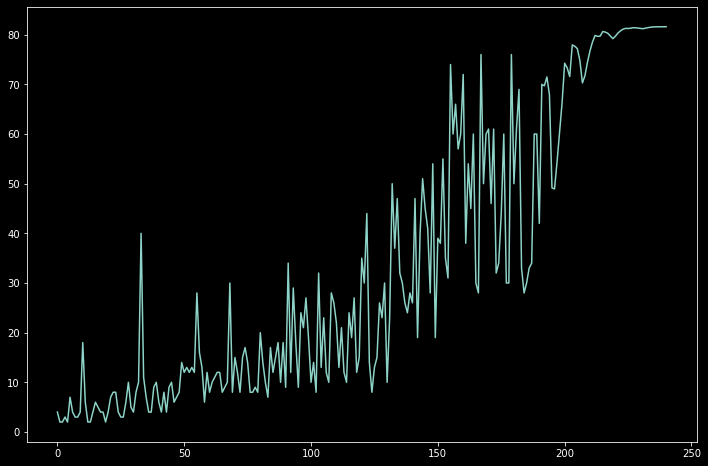

In [134]:
### plotting the forcasted Good results with the original values ###
plt.figure(figsize=(12,8))
plt.plot(df3)